# DataViz Project 2

The dataset contains daily worldwide COVID-19 data. It is downloaded from: https://ourworldindata.org/coronavirus-source-data. Plotting the visualization using the dataset data to answer/corresponding the following questions.  


In [41]:
#####
#iamfaiq

# Question 1
Please plot the number of total cases (on March 1st, 2021) for each country on a world map.

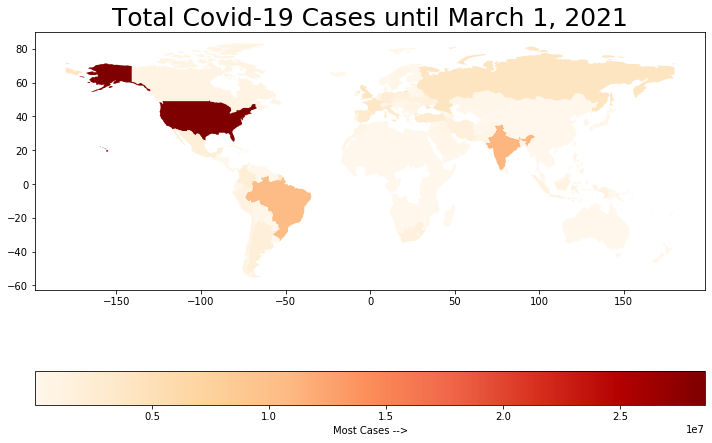

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas
df = pd.read_csv('owid-covid-data.csv')
#df


df = df[['iso_code','location','date','total_cases']]
df = df[(df['date'] == '2021-03-01')] # getting values corresponding to March 1 only

#type(df)
df['total_cases']=pd.to_numeric(df["total_cases"])

'''
#df.plot()
#df.axes
#type(df)
'''
#getting the world map with longitude, latitude, iso_names, country names, etc.:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

#column:location value changed from United States to fullname in USA iso rows
df.loc[df.iso_code=='USA', 'location'] = 'United States of America' 

df = df.rename(columns={"location": "name"}) #changing country column name from location to name

merged_df = world.merge(df, on='name') #merging df with world geopandas on country name

fig, ax = plt.subplots(figsize=(12,10))

merged_df.plot(column='total_cases', legend=True,
              legend_kwds={'label': 'Most Cases -->',
                          'orientation':'horizontal'},
              cmap='OrRd',ax=ax)
ax.set_title('Total Covid-19 Cases until March 1, 2021', fontsize=25)
plt.show()


# Question 2
Visualize the time series for Canada's daily new cases (2020/01/26-2021/03/09). Smooth the time series using simple moving average with window size 5 (start the smoothing curve from the end of the first window).

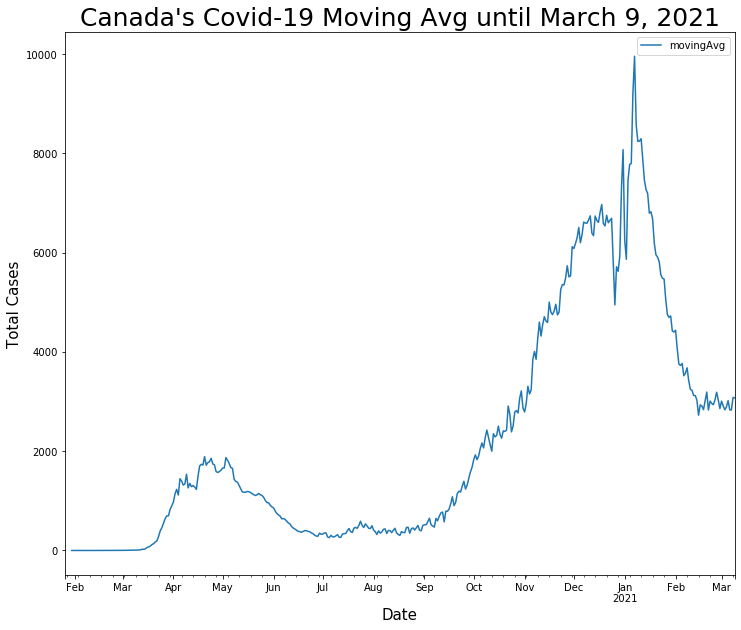

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('owid-covid-data.csv')
#df
df = df[['date', 'location', 'new_cases']]
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
q2df = df[(df.date >= '2020-01-26') & (df.date <= '2021-03-09')]

q2df = q2df[(q2df['location']=='Canada')]
q2df = q2df[['date', 'new_cases']]
#q2df.axes
#type(q2df)

#[:,1] - column slicing: ignores rows, and gets all values in new_cases for calculating rolling avg
q2df['movingAvg'] = q2df.iloc[:,1].rolling(window=5).mean()
#q2df.head(6)


fig, ax = plt.subplots(figsize=(12,10))
q2df.plot(x='date',y='movingAvg',ax=ax)#(column='movingAvg')
ax.set_title('Canada\'s Covid-19 Moving Avg until March 9, 2021', fontdict={'fontsize':'25'})
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('Total Cases',fontsize=15)
plt.show()
